<a href="https://colab.research.google.com/github/Fahimunnisha/Align-guard-intern/blob/main/FitnessData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



**Prepocessing**

In [ ]:
data = pd.read_csv('/content/dailyActivity_merged.csv')




In [ ]:
print(data.head())




           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

In [ ]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [ ]:
data.isnull().sum()

,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0
SedentaryActiveDistance,0


In [ ]:
data.dtypes

,0
Id,int64
ActivityDate,object
TotalSteps,int64
TotalDistance,float64
TrackerDistance,float64
LoggedActivitiesDistance,float64
VeryActiveDistance,float64
ModeratelyActiveDistance,float64
LightActiveDistance,float64
SedentaryActiveDistance,float64


In [ ]:
data.duplicated().sum()

0

In [ ]:

data['ActivityDate'] = pd.to_datetime(data['ActivityDate'],format="%m/%d/%Y")

data['Day'] = data['ActivityDate'].dt.day_name()

data['TotalMinutes'] = data['VeryActiveMinutes'] + data['FairlyActiveMinutes'] + data['LightlyActiveMinutes'] + data['SedentaryMinutes']



Relation between calories and TotalSteps


In [ ]:
fig = px.scatter(data_frame = data, x ='Calories',y='TotalSteps',size ='VeryActiveMinutes',trendline='ols',title="Relationship between Calories & Total Steps")
fig.show()

Distribution of calories on each day


In [ ]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
Colors = ['red','green','yellow','blue','violet','magenta','maroon']
explode = (0.1, 0, 0, 0, 0, 0, 0)

fig = go.Figure(data=[go.Pie(
    labels=label,
    values=counts,
    marker=dict(colors=Colors),
    pull=explode
)])

fig.update_layout(title_text='Calories Burned Daily')
fig.show()

Correlation Matrix


In [ ]:

numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

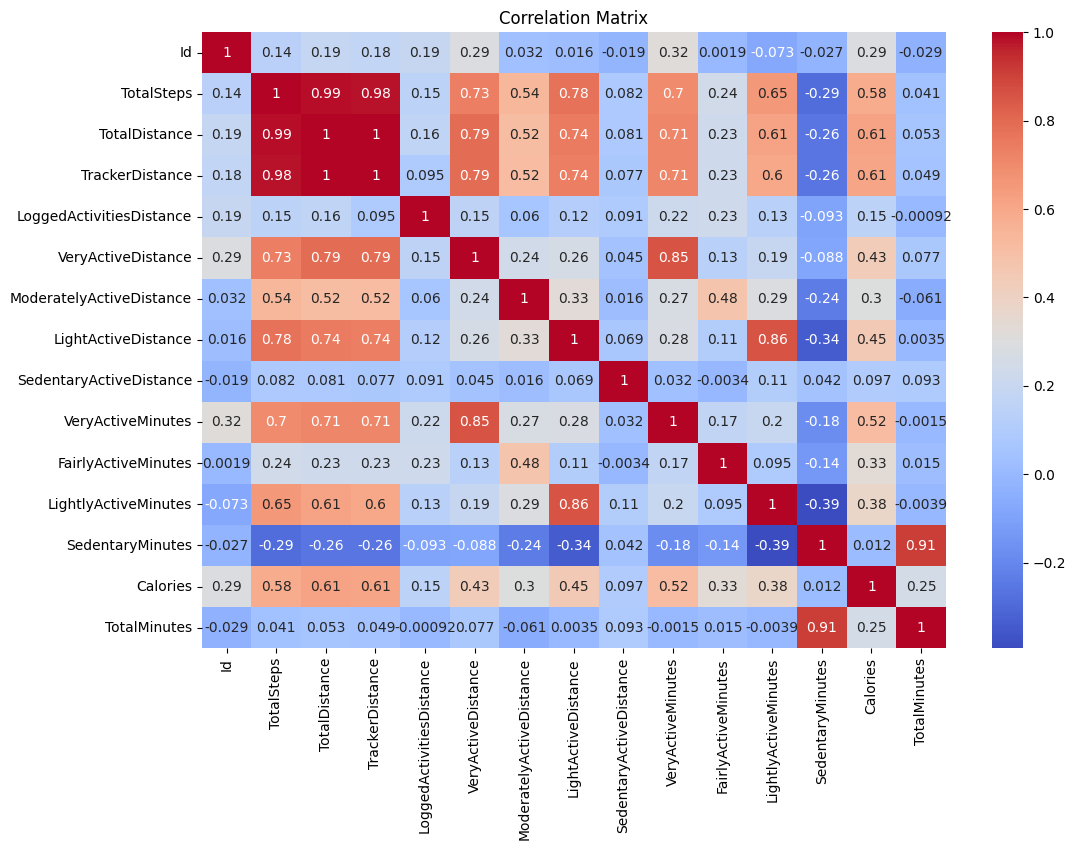

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.drop(columns=["LoggedActivitiesDistance","SedentaryActiveDistance"])

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,TotalMinutes
0,1503960366,2016-03-25,11004,7.110000,7.110000,2.57,0.46,4.07,33,12,205,804,1819,Friday,1054
1,1503960366,2016-03-26,17609,11.550000,11.550000,6.92,0.73,3.91,89,17,274,588,2154,Saturday,968
2,1503960366,2016-03-27,12736,8.530000,8.530000,4.66,0.16,3.71,56,5,268,605,1944,Sunday,934
3,1503960366,2016-03-28,13231,8.930000,8.930000,3.19,0.79,4.95,39,20,224,1080,1932,Monday,1363
4,1503960366,2016-03-29,12041,7.850000,7.850000,2.16,1.09,4.61,28,28,243,763,1886,Tuesday,1062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,20.389999,20.389999,11.10,0.63,8.62,70,29,359,982,4196,Friday,1440
453,8877689391,2016-04-09,16470,8.070000,8.070000,0.00,0.02,8.02,90,9,289,1052,3841,Saturday,1440
454,8877689391,2016-04-10,28497,27.530001,27.530001,21.92,1.12,4.46,128,46,211,1055,4526,Sunday,1440
455,8877689391,2016-04-11,10622,8.060000,8.060000,1.47,0.15,6.37,18,7,225,1190,2820,Monday,1440


Splitting of data into Train and Test


In [ ]:

numeric_data = data.select_dtypes(include=['number'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)
X = data_scaled[:, :-1]
y = data_scaled[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Regression output
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8104 - mean_absolute_error: 1.0691 - val_loss: 0.6812 - val_mean_absolute_error: 0.7364
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5929 - mean_absolute_error: 0.9608 - val_loss: 0.6100 - val_mean_absolute_error: 0.7111
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0429 - mean_absolute_error: 0.8036 - val_loss: 0.5573 - val_mean_absolute_error: 0.6785
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1198 - mean_absolute_error: 0.8147 - val_loss: 0.5144 - val_mean_absolute_error: 0.6501
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8514 - mean_absolute_error: 0.7204 - val_loss: 0.4532 - val_mean_absolute_error: 0.6080
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6839 - mean_absolute_error: 0.6655 - val_loss: 0.4183 - val_mean_absolute_error: 0.5819
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8612 - mean_absolute_error: 0.7189 - val_loss: 0.3885 - 

Linear Regression


Mean Squared Error: 1.3825916126417812e-30


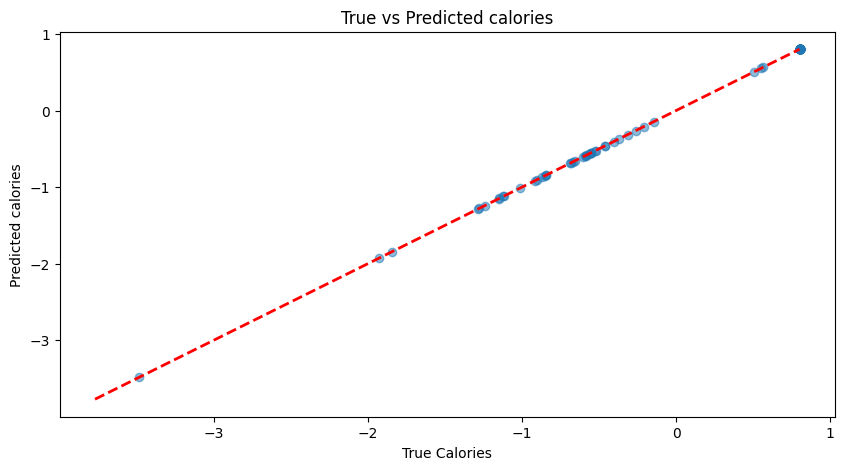

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Calories')
plt.ylabel('Predicted calories')
plt.title('True vs Predicted calories')
plt.show()




Longitudinal Analysis

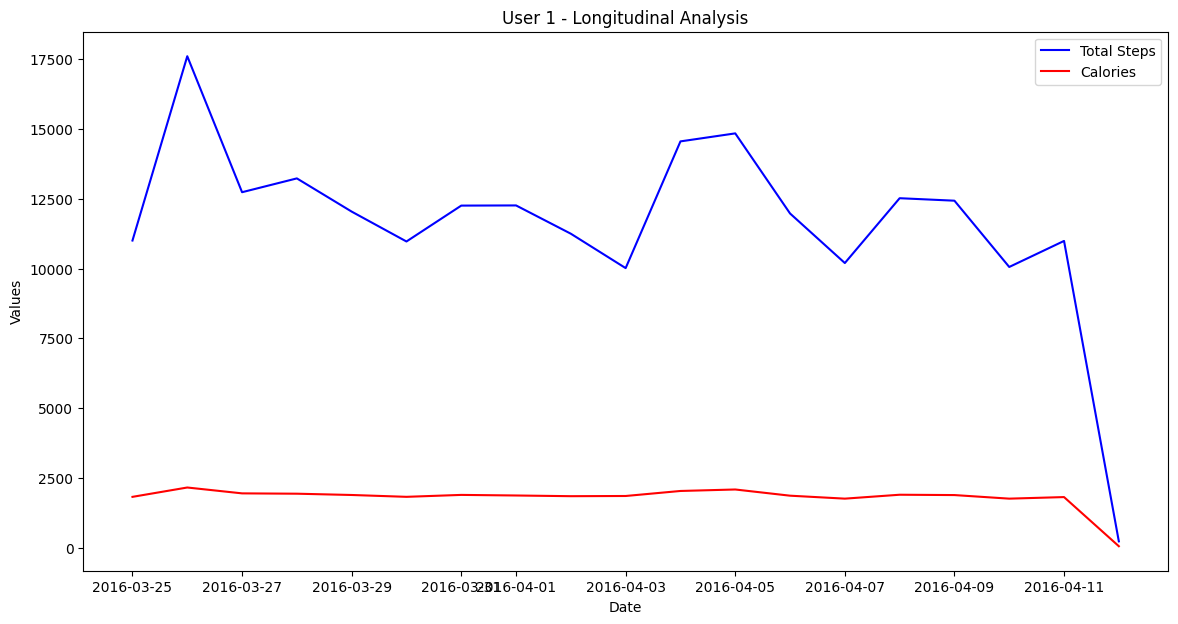

In [ ]:

data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])



# Filter data for the specific user
user_data = data[data['Id']==1503960366]

# Check if the user_data DataFrame is not empty
if not user_data.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(user_data['ActivityDate'], user_data['TotalSteps'], label='Total Steps', color='blue')
    plt.plot(user_data['ActivityDate'], user_data['Calories'], label='Calories', color='red')

    plt.title(f'User {Id} - Longitudinal Analysis')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
else:
    print(f"No data available for User {Id}.")




Recommendations


In [ ]:

def provide_recommendations(row):
    if row['TotalSteps'] < 5000:
        return "Increase your daily steps to at least 5000 to maintain good health."
    elif row['Calories'] < 2000:
        return "Try to burn more calories to maintain a healthy lifestyle."
    else:
        return "Great job! Keep maintaining your current activity levels."



data['Recommendations'] = data.apply(provide_recommendations, axis=1)

In [ ]:
print(data[['ActivityDate', 'TotalSteps', 'Calories', 'Recommendations']].head(20))

   ActivityDate  TotalSteps  Calories  \
0    2016-03-25       11004      1819   
1    2016-03-26       17609      2154   
2    2016-03-27       12736      1944   
3    2016-03-28       13231      1932   
4    2016-03-29       12041      1886   
5    2016-03-30       10970      1820   
6    2016-03-31       12256      1889   
7    2016-04-01       12262      1868   
8    2016-04-02       11248      1843   
9    2016-04-03       10016      1850   
10   2016-04-04       14557      2030   
11   2016-04-05       14844      2083   
12   2016-04-06       11974      1861   
13   2016-04-07       10198      1755   
14   2016-04-08       12521      1895   
15   2016-04-09       12432      1883   
16   2016-04-10       10057      1755   
17   2016-04-11       10990      1811   
18   2016-04-12         224        50   
19   2016-03-25        1810      1373   

                                      Recommendations  
0   Try to burn more calories to maintain a health...  
1   Great job! Keep mainta